
# Intro to Quantum Computing and Quantum Logic Gates

This is an introductory talk on Quantum Computing made for QPower, so it is aimed towards a public with a considerable amount of knowledge, both in programming and in math (you MUST at least know how to multiply matrices to read this). For this reason, I opted for a more hands-on, visual approach.

It will just cover gate quantum computation model - there will be no annealing discussed here.

I will be covering two initial topics: _general concepts_ and _quantum logic gates_. This will be done using the Qiskit (it is pronounced "quiskit", according to their website) library within a Python language environment.

Since I will be resorting to visual aid, in case you haven't a good knowledge of the Python language, it shouldn't be something that will impact the general knowledge of the concepts/ideas behind this tutorial.

The output of the cell below may be considerably big - you can just ignore it and scroll below for the main content.

In [ ]:
# Installation of the Qiskit library
!pip install qiskit

     |████████████████████████████████| 8.3MB 2.6MB/s 
     |████████████████████████████████| 16.5MB 255kB/s 
     |████████████████████████████████| 174kB 56.8MB/s 
     |████████████████████████████████| 174kB 57.9MB/s 
     |████████████████████████████████| 1.9MB 25.6MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 5.8MB 52.0MB/s 
     |████████████████████████████████| 1.1MB 50.0MB/s 
     |████████████████████████████████| 296kB 45.2MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 583kB 38.9MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 2.6MB 49.9MB/s 
  Created wheel for qiskit: filename=qiskit-0.21.0-cp36-none-any.whl size=2875 sha256=a335c5243757b5cfd444d2dd16197a0904c0676c4345e958c85a8c8e24f17f7a
  Stored in directory: /root/.cache/pip/wheels/f3/b7/87/cdde69a6f1be1a7d01c751eaae325e306e147d3a2e1a738b44
  Created wheel for

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from qiskit import *
from qiskit.extensions import Initialize

## Computation and Information

The whole idea behind computers is totally related to the theory of information. Both fields walk together, and are very much intertwined in their progress.

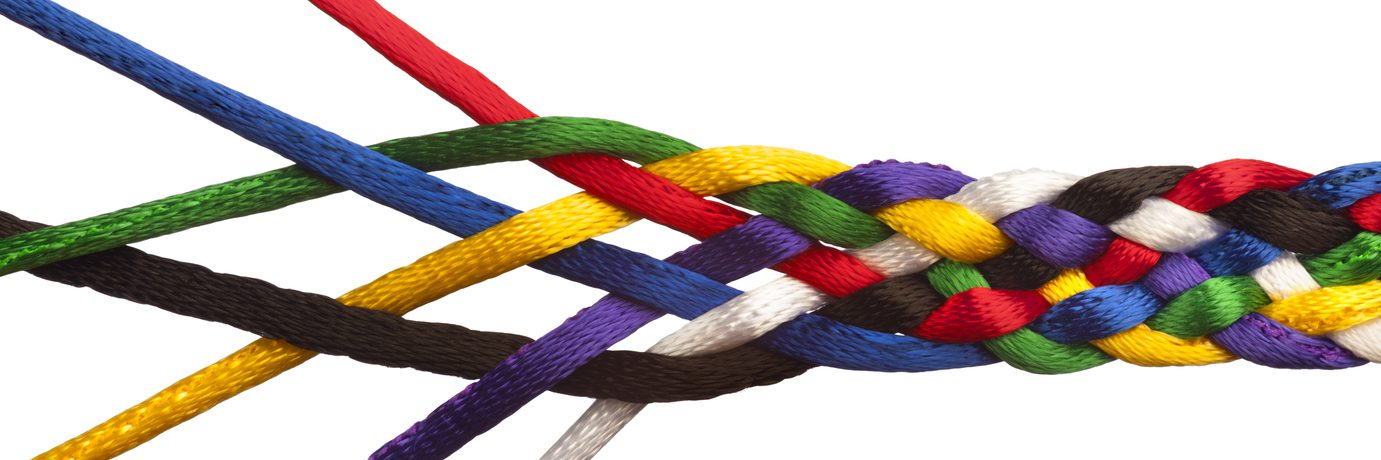

So, when talking about both quantum and classical computing, we have to start from this basic standpoint: we are dealing with different ways of processing information. In this sense, we have to define what _processing_ means: 

$$\text{Input } \Longrightarrow \text{ Output}$$

When we grasp any amount of information, and handle it in any way whatsoever, with some sort of information being obtained as a result, we are _processing_ this information, or we could even say _computing_ it. In here, we will not consider notions such as transmitters, receivers and noise sources - the idea is just to understand what is meant by computing/processing information in general.

But how does that helps in understanding how classical and quantum computing are different?

The first difference is in the fundamental unit of information. Without diving too deep in Information Theory [(see this link to know how it all began)](http://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf), let's talk a little bit about both fundamental units - the _bit_ and the _qubit_.

## Bits and Qubits

A _bit_ is the fundamental unit of information within the classical computing environment. It represents an entity capable of store two stable positions, like a relay. On and off, 0 or 1, current or no current. In vector notation:

_(Note: if you know how to write Dirac notation here, please let me know!)_

$$1 = \begin{pmatrix} 0\\1 \end{pmatrix}\space and\space\space 0 = \begin{pmatrix} 1\\0 \end{pmatrix} $$

In [ ]:
zero = np.matrix('1;0')
one = np.matrix('0;1')

### Four basic operations with bits

With _bits_, there are four possible basic operations that can be done:

$$\text{Identity:}\space\space {f}(x) = x$$<br>
$$\text{Negation:}\space\space {f}(x) = \neg x$$<br>
$$\text{Constant-0:}\space\space {f}(x) = 0$$<br>
$$\text{Constant-1:}\space\space {f}(x) = 1$$<br>

Using the matrix notation:

In [ ]:
# Identity:
identity = np.matrix('1 0; 0 1')
print('The identity matrix:')
print(identity,'\n')

# Multiplying zero by the identity matrix returns zero,
result = identity @ zero
print(result, '\n')

# And multiplying one by the identity matrix returns one, as expected.
result = identity @ one
print(result)

The identity matrix:
[[1 0]
 [0 1]] 

[[1]
 [0]] 

[[0]
 [1]]


In [ ]:
# Negation:
neg = np.matrix('0 1; 1 0')
print('The negation matrix:')
print(neg, '\n')

# Multiplying zero by the negation matrix will return one,
result = neg @ zero
print(result, '\n')

# And multiplying one by the negation matrix will return zero, as expected.
result = neg @ one
print(result)

The negation matrix:
[[0 1]
 [1 0]] 

[[0]
 [1]] 

[[1]
 [0]]


In [ ]:
# Constant-0:
c_zero = np.matrix('1 1; 0 0')
print('The Constant-0 matrix:')
print(c_zero, '\n')

# Multiplying zero by the Constant-0 matrix will return zero,
result = c_zero @ zero
print(result, '\n')

# And multiplying one by the Constant-0 matrix will also return zero, as expected.
result = c_zero @ one
print(result)

The Constant-0 matrix:
[[1 1]
 [0 0]] 

[[1]
 [0]] 

[[1]
 [0]]


In [ ]:
# Constant-1:
c_one = np.matrix('0 0; 1 1')
print('The Constant-1 matrix:')
print(c_one, '\n')

# Multiplying zero by the Constant-1 matrix will return one,
result = c_one @ zero
print(result, '\n')

# And multiplying one by the Constant-1 matrix will also return one, as expected.
result = c_one @ one
print(result)

The Constant-1 matrix:
[[0 0]
 [1 1]] 

[[0]
 [1]] 

[[0]
 [1]]


### Reversible operations with bits

For the purposes of our explanation here, we will define _reversible operations_ as **any _process_** (cf. the aforementioned definition of processing) **that allows the identification of the input just by knowing the operation used and the output**.

E.g.: In our operations above, identity and negation are reversible, but constant-0 and constant-1 are not. 

So, we can have operations with bits that aren't reversible, and that isn't an issue.

### Tensor Products

In order to fully understand some of the next concepts, it is necessary to explain a concept that is not always taught in the regular Linear Algebra classes: Tensor Products [(for further explanation, click here)](https://www.grc.nasa.gov/www/k-12/Numbers/Math/documents/Tensors_TM2002211716.pdf).


These examples will suffice to explain how tensor products work:<br><br>
$$\begin{pmatrix} x_{0} \\ x_{1} \end{pmatrix} \otimes \begin{pmatrix} y_{0} \\ y_{1} \end{pmatrix} = \begin{pmatrix} x_{0}y_{0} \\ x_{0}y_{1} \\ x_{1}y_{0} \\ x_{1}y_{1} \end{pmatrix} $$


Another example:<br><br>

$$\begin{pmatrix} x_{0} \\ x_{1} \end{pmatrix} \otimes \begin{pmatrix} y_{0} \\ y_{1} \end{pmatrix} \otimes \begin{pmatrix} z_{0} \\ z_{1} \end{pmatrix} = \begin{pmatrix} x_{0}y_{0}z_{0} \\ x_{0}y_{0}z_{1} \\ x_{0}y_{1}z_{0} \\ x_{0}y_{1}z_{1} \\ x_{1}y_{0}z_{0} \\ x_{1}y_{0}z_{1} \\ x_{1}y_{1}z_{0} \\ x_{1}y_{1}z_{1} \end{pmatrix} $$


### Representing multiple bits

To represent multiple bit states, we use tensor products of single-bit vectors. Again, this is a simplified explanation, but this will be helpful in understanding operations with multiple bits, and it will be very useful to show the power of quantum computing.

The tensored representation of multiple bits is called _product state_. This representation is very useful, because it allows factoring the product state into the individual state representations.

Let's use as an example the product states for two bits:

$$\text{We have four possible states for two bits:}$$

$$00, 01, 10\space or\space 11$$:

$$\begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} \space\space\text{0 tensored with 0,}$$

$$\begin{pmatrix} 1 \\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} \space\space\text{0 tensored with 1,}$$

$$\begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} \space\space\text{1 tensored with 0,}$$

$$\begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} \space\space\text{and 1 tensored with 1}$$

In [ ]:
# Displaying the same thing using NumPy:

zero_zero = np.kron(zero, zero) 
zero_one = np.kron(zero, one)
one_zero = np.kron(one, zero)
one_one = np.kron(one, one)
print(zero_zero,'\n\n', zero_one,'\n\n', one_zero,'\n\n', one_one)

[[1]
 [0]
 [0]
 [0]] 

 [[0]
 [1]
 [0]
 [0]] 

 [[0]
 [0]
 [1]
 [0]] 

 [[0]
 [0]
 [0]
 [1]]


So, if we have _2_ bytes, there are four possible _product states_.

Therefore, the number of possible _product states_ with _n_ bytes will be $ 2^{n}$.

### An operation with multiple bits: CNOT

Now let's talk about one of the fundamental building blocks of reversible computing: the CNOT operation.

The Control-Not operation works in pairs of _bits_; one is assigned as _control_, and the other as _target_.

The way this _gate_(we'll call these operations gates from now on) behaves is the following:

- If the control bit is 1, then the target gets flipped
- If the control bit is 0, then the target remains unchanged
- The control bit never gets changed.
- The most-significant bit (the one on the left) is control, and the other one is the target;

Example:

In [ ]:
cnot = np.matrix('1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0')
print(cnot)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [ ]:
# CNOT on 00:
result = cnot @ zero_zero 
print('Since the control bit is zero, the target bit remains unchanged here,\n')
print(result, '\n')

# CNOT on 01
result = cnot @ zero_one
print('and here as well.\n')
print(result)

Since the control bit is zero, the target bit remains unchanged here,

[[1]
 [0]
 [0]
 [0]] 

and here as well.

[[0]
 [1]
 [0]
 [0]]


In [ ]:
# CNOT on 10:
result = cnot @ one_zero 
print('However, it gets flipped both here,\n')
print(result, '\n')

# CNOT on 11
result = cnot @ one_one
print('and here as well.\n')
print(result)

However, it gets flipped both here,

[[0]
 [0]
 [0]
 [1]] 

and here as well.

[[0]
 [0]
 [1]
 [0]]


### Quantum fundamental units: _qubits_

The first thing worth mentioning here is that all operations with quantum bits have to be reversible - and they are. They are also their own reverse - in other words, if you apply the same operation twice, you'll get the initial result.

We can go even further here: quantum mechanics _is_ reversible, and more specifically, it is _unitary_ - this follows from Schröddinger equation, except the measurement, which is not an operation/gate (if this doesn't make sense for you, don't worry: focus on the mathematics below and you should be fine).

Guess what? Everything we've displayed for classical bits, so far, is similar to what we'll do for qubits! We can even boldly say that the classical bit vectors above are special cases of qubit vectors.

 **Definition:**<br><br>
 A qubit is represented by a vector $\begin{pmatrix} a \\ b \end{pmatrix} : \space a,b \in \mathbb{C}\space\space, \lVert a\rVert^{2} + \lVert b\rVert^{2} = 1$

Examples: $\begin{pmatrix} -1 \\ 0 \end{pmatrix}, \begin{pmatrix} \frac12 \\ \frac{\sqrt3}{2} \end{pmatrix}, \begin{pmatrix} \frac{1}{\sqrt2} \\ \frac{1}{\sqrt2} \end{pmatrix}, \begin{pmatrix} \frac{1}{\sqrt2} \\ \frac{-1}{\sqrt2} \end{pmatrix}$

But with this, a question then arises: if we were considering a bit the unit capable of being either "there or not there" (two possible values), how come we see values different than 0 or 1 in a qubit?

I'll just go ahead and say that in such cases, they're being both values at the same time!

### Superposition - Math explanation

It is time to go ahead and start facing the complicated definitions involved with qubits. 

Instead of having to tackle the physical explanation of a qubit being able to be both 0 and 1 at the same time (which is actually true), let's try to stick to the math here - it is actually easier to understand this way.

An important thing to understand regarding qubits is that whenever they're measured, they'll _collapse_ to a value of either 0 or 1.

So, the good thing about the vector notation can be seen here: the probability of a qubit $\begin{pmatrix} a \\ b  \end{pmatrix}$ to collapse to 0 is $\lVert a\rVert^{2}$ and to 1, $\lVert b\rVert^{2}$

This definition will help us to better understand the behavior of a multiple qubit system.


### Multiple qubits

The representation of a system with multiple qubits is similar to what we've used for classical bits: it consists of a tensor product of single qubits.

In [ ]:
## Example using NumPy:

# Let's take a qubit (1/sqrt(2), 1/sqrt(2)):
qubit = np.array([[1/sqrt(2)],[1/sqrt(2)]])

# Its product state is the tensor product of it by itself:
product_state = np.kron(qubit, qubit)
print(product_state)
# Note that for the resulting product state, the sum of the squares of the
# moduli will still be 1.

[[0.5]
 [0.5]
 [0.5]
 [0.5]]


Looking to the product state above, the system has a $\lVert\frac12\rVert^{2}= \frac14 $ probability (we call this amplitude) each of collapsing to 00, 01, 10 or 11 states after being measured.

## Quantum Gates (operations with qubits)

All the operations (gates) described above for bits work for qubits, with a fundamental difference: as we've stated before, they have to be reversible.

Let's start with the most important gate - the Hadamard gate.

### Hadamard

_From this point forward, we'll start using the Qiskit library in order to be able to display the circuit notation as well._

The Hadamard gate (H-gate) takes a 0 or 1 qubit and puts it into exactly equal superposition:

$$ H = \begin{pmatrix} \frac1{\sqrt2} \ \frac1{\sqrt2} \\ \frac1{\sqrt2} \ \frac{-1}{\sqrt2} \end{pmatrix}$$

In [ ]:
hadamard = np.array([[1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)]])

# Applying Hadamard to qubit 0,
result = hadamard @ zero
print(result, '\n')

# and to qubit 1:
result = hadamard @ one
print(result)

[[0.70710678]
 [0.70710678]] 

[[ 0.70710678]
 [-0.70710678]]


This result shows qubit vectors in superposition, with an equal probability of collapsing into either 0 or 1. 

**Question**
What happens if we apply the H-gate to one of the resulting qubits in superposition above?



### Circuit notation

One of the notations we use to represent a sequence of operations with qubits is the circuit notation.

A significant advantage of the Qiskit library is to allow us to visualize these operations using this notation, as demonstrated below:

In [ ]:
def challengeTwo(qc, qubit):
  qc.x(qubit)
  qc.h(qubit)
  qc.x(qubit)
  qc.h(qubit)
  qc.x(qubit)
  return qc



quantum_circuit = QuantumCircuit(1)
initial_state = [1,0]
initializer = Initialize(initial_state)
initializer.label = "init"
challengeTwo(quantum_circuit, 0)
quantum_circuit.draw()


┌───┐┌───┐┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘

This diagram above exhibits a sequence of operations that are performed within a given circuit (thus the name circuit notation).

Particularly, in this case, from an input of a qubit 0, the following operations are being applied:



1.   A Pauli-X gate (think of the negation operation for a bit) 
2.   A Hadamard gate
3.   Another Pauli-X 
4.   Another Hadamard
5.   Another Pauli-X


**Question** Can you determine the outcome if the qubit is measured after these five operations?



### Pauli

If you're somewhat familiar with Linear Algebra, you probably have heard about the Pauli matrices - a set of three 2x2 matrices that are both Hermitian and unitary (you can totally ignore that if you didn't get it, that's fine as well).

Let's start with the one that was mentioned in the previous section, the Pauli-X gate (and it's totally fine to just refer to it as X gate):


####Pauli X


$$ X = \begin{pmatrix} 0 \ 1 \\ 1 \ 0 \end{pmatrix}$$

It is the same matrix used for the negation gate in a bit, right? So, let's observe it with a qubit:

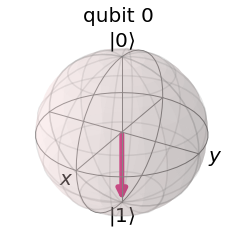

In [ ]:
from qiskit.visualization import plot_bloch_multivector

# Let's design a circuit with a single qubit initialized in the
# 0 state and apply an X-gate to it:

qc = QuantumCircuit(1)
qc.x(0)

# This sphere below is called the Bloch sphere, and it is used to
# represent qubits. As seen below, that's where the qubit "lands at"
# after passing through the circuit:
backend = Aer.get_backend('statevector_simulator')
output = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(output)

As expected, the resulting state is 1, as expected: a rotation of $\pi$ radians around the _x_ axis of the sphere.

You'll also see this gate being called as the _NOT_-gate.

#### Pauli Y

Similarly to the X-gate, this one will rotate a qubit $\pi$ radians around the _y_ axis of the sphere:

$$ Y = \begin{pmatrix} 0 \ -i \\ i \ 0 \end{pmatrix}$$

#### Pauli Z

As you've probably guessed, the Z-gate rotates a qubit $\pi$ radians around the _z_ axis:

$$ Z = \begin{pmatrix} 1 \ 0 \\ 0 \ {-1} \end{pmatrix}$$


### $R_\phi$ (or $R_z$)

The $R_\phi$ gate is a parametrized gate that performs a rotation of $\phi$ degrees along the Z-axis:


$$ R_\phi = \begin{pmatrix} 1 \ 0 \\ 0 \ e^{i\phi} \end{pmatrix} , with \space\space \phi \in \mathbb R $$

### Identity

The I-gate (Identity) does exactly what's expected of it: nothing. Still, it has some applications that won't be discussed here.

### T

The T-gate is an $R_\phi$ gate with $\phi = \frac{\pi}{4}$:

$$ T = \begin{pmatrix} 1 \ 0 \\ 0 \ e^{i\frac{\pi}{4}} \end{pmatrix} \text{and } T\dagger = \begin{pmatrix} 1 \ 0 \\ 0 \ e^{-i\frac{\pi}{4}} \end{pmatrix}$$ 

### S

The S-gate is an $R\phi$ gate with $\phi = \frac{\pi}{2}:$

$$ S = \begin{pmatrix} 1 \ 0 \\ 0 \ e^{i\frac{\pi}{2}} \end{pmatrix} \text{and } S\dagger = \begin{pmatrix} 1 \ 0 \\ 0 \ e^{-i\frac{\pi}{2}} \end{pmatrix}$$ 

It is worth noting that applying two S-gates is, as expected, equivalent to applying a Z-gate.

### $U_3$

All gates shown above can be considered special cases of the $U_3$ gate. It is hardly seen on diagrams, due to the many intricacies that would be involved in using it:

$$ U_3(\theta,\phi,\lambda) = \begin{pmatrix} \cos(\frac\theta2) \ -e^{i\lambda}\sin(\frac\theta2) \\ e^{i\phi}\sin(\frac\theta2) \ e^{i\phi+i\theta}\cos(\frac\theta2) \end{pmatrix}$$

There are two special cases: $U_1$ and $U_2$:

The $U_1$ gate is equivalent to the $R_\phi$ gate.

All single-qubit operations on Qiskit are compiled down to $U_1$, $U_2$, and $U_3$ gates before running on real IBM quantum hardware, and for that reason they are sometimes referred to as _physical gates_.

It should be obvious from this that there are an infinite number of possible gates, and that this also includes Rx and Ry-gates, although they are not mentioned here. It must also be noted that there is nothing special about the Z-basis, except that it has been selected as the standard computational basis. That is why we have names for the S and T-gates, but not their X and Y equivalents.